In [1]:
import os #importar herramientas del OS (acceso a archivos)
import numpy as np
import shutil
import glob
import xml.etree.ElementTree as ET
import pandas as pd
import tensorflow as tf #Importar Framework de entrenamiento


In [2]:
#!pip install matplotlib-inline
#!pip install ipython

In [3]:
#Creacion estructura de carpetas
#https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md
MODEL_NAME = 'ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8'
MODEL_URL = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz'

In [4]:
paths = {
    'WORKSPACE_PATH': os.path.join('workspace'),
    'DATA_PATH' : os.path.join('workspace','data'),
    'TRAINING_PATH' : os.path.join('workspace','training'),
    'ANNOTATIONS_PATH' : os.path.join('workspace','data','annotations'),
    'IMAGES_PATH' : os.path.join('workspace','data','images'),
    'TRAIN_LABELS_PATH' : os.path.join('workspace','data','train_labels'),
    'TEST_LABELS_PATH' : os.path.join('workspace','data','test_labels'),
    'IMAGES_PATH' : os.path.join('workspace','data','images'),
    'MODELS_PATH': os.path.join('Tensorflow','models'),
}
files = {
    'ORIGINAL_MODEL_CONFIG':os.path.join('Tensorflow','models','research','object_detection','configs','tf2', MODEL_NAME+'.config'),
    'MODEL_CONFIG':os.path.join('workspace','data', MODEL_NAME+'.config'),
    'LABEL_MAP':os.path.join('workspace','data','label_map.pbtxt'),
}
for path in paths.values():
    if not os.path.exists(path):
        !mkdir -p {path}

In [5]:
#Descargar modelo ssd seleccionado y descomprimirlo

!wget -nc {MODEL_URL} -P {paths['DATA_PATH']}
!tar -xzvf {os.path.join(paths['DATA_PATH'],MODEL_NAME+'.tar.gz')} --directory {paths['DATA_PATH']}

File ‘workspace/data/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ already there; not retrieving.

ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/saved_model.pb
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/saved_model/variables/variables.index


In [6]:
#Descargar modelos TF
!git clone https://github.com/tensorflow/models.git {paths['MODELS_PATH']}
!cp {files['ORIGINAL_MODEL_CONFIG']} {paths['DATA_PATH']}

fatal: destination path 'Tensorflow/models' already exists and is not an empty directory.


In [7]:
!apt-get install protobuf-compiler
!cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 

E: Could not open lock file /var/lib/dpkg/lock-frontend - open (13: Permission denied)
E: Unable to acquire the dpkg frontend lock (/var/lib/dpkg/lock-frontend), are you root?
Processing /home/jeronimo/Gits/myeyes-trainer/Tensorflow/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.


  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1657885 sha256=4cb0e9cc66d0db47c617f957f18f7f3629ed3b2a694e5e1105fd43cb99263276
  Stored in directory: /tmp/pip-ephem-wheel-cache-3lgcfbtn/wheels/0e/c2/c1/cfab67277d450ac4d5ef8c506f35d21b3c1e0587bd15cc276a
Successfully built object-detection
  Attempting uninstall: object-detection
    Found existing installation: object-detection 0.1
    Uninstalling object-detection-0.1:
      Successfully uninstalled object-detection-0.1


In [8]:
#Evaluador de requisitos [Tiene que decir OK al final]
VERIFICATION_SCRIPT = os.path.join(paths['MODELS_PATH'],'research','object_detection','builders','model_builder_tf2_test.py')
!python {VERIFICATION_SCRIPT}

2022-04-26 15:18:30.692699: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-26 15:18:30.737721: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-26 15:18:30.738765: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
Running tests under Python 3.9.7: /home/jeronimo/anaconda3/envs/tf_gpu/bin/python
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2022-04-26 15:18:30.753686: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU ins

INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_faster_rcnn_models_from_config_mask_rcnn_without_matmul): 0.09s
I0426 15:18:35.378805 139688264151872 test_util.py:2458] time(__main__.ModelBuilderTF2Test.test_create_faster_rcnn_models_from_config_mask_rcnn_without_matmul): 0.09s
[       OK ] ModelBuilderTF2Test.test_create_faster_rcnn_models_from_config_mask_rcnn_without_matmul
[ RUN      ] ModelBuilderTF2Test.test_create_rfcn_model_from_config
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_rfcn_model_from_config): 0.09s
I0426 15:18:35.469392 139688264151872 test_util.py:2458] time(__main__.ModelBuilderTF2Test.test_create_rfcn_model_from_config): 0.09s
[       OK ] ModelBuilderTF2Test.test_create_rfcn_model_from_config
[ RUN      ] ModelBuilderTF2Test.test_create_ssd_fpn_model_from_config
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_ssd_fpn_model_from_config): 0.03s
I0426 15:18:35.497307 139688264151872 test_util.py:2458] time(__main__.Model

I0426 15:18:39.016465 139688264151872 ssd_efficientnet_bifpn_feature_extractor.py:145] EfficientDet EfficientNet backbone version: efficientnet-b2
I0426 15:18:39.016573 139688264151872 ssd_efficientnet_bifpn_feature_extractor.py:147] EfficientDet BiFPN num filters: 112
I0426 15:18:39.016650 139688264151872 ssd_efficientnet_bifpn_feature_extractor.py:148] EfficientDet BiFPN num iterations: 5
I0426 15:18:39.018053 139688264151872 efficientnet_model.py:144] round_filter input=32 output=32
I0426 15:18:39.033494 139688264151872 efficientnet_model.py:144] round_filter input=32 output=32
I0426 15:18:39.033589 139688264151872 efficientnet_model.py:144] round_filter input=16 output=16
I0426 15:18:39.152909 139688264151872 efficientnet_model.py:144] round_filter input=16 output=16
I0426 15:18:39.153010 139688264151872 efficientnet_model.py:144] round_filter input=24 output=24
I0426 15:18:39.374952 139688264151872 efficientnet_model.py:144] round_filter input=24 output=24
I0426 15:18:39.375063 13

I0426 15:18:43.213943 139688264151872 efficientnet_model.py:144] round_filter input=16 output=24
I0426 15:18:43.214048 139688264151872 efficientnet_model.py:144] round_filter input=24 output=32
I0426 15:18:43.529120 139688264151872 efficientnet_model.py:144] round_filter input=24 output=32
I0426 15:18:43.529229 139688264151872 efficientnet_model.py:144] round_filter input=40 output=56
I0426 15:18:43.831385 139688264151872 efficientnet_model.py:144] round_filter input=40 output=56
I0426 15:18:43.831489 139688264151872 efficientnet_model.py:144] round_filter input=80 output=112
I0426 15:18:44.279745 139688264151872 efficientnet_model.py:144] round_filter input=80 output=112
I0426 15:18:44.279854 139688264151872 efficientnet_model.py:144] round_filter input=112 output=160
I0426 15:18:44.741441 139688264151872 efficientnet_model.py:144] round_filter input=112 output=160
I0426 15:18:44.741548 139688264151872 efficientnet_model.py:144] round_filter input=192 output=272
I0426 15:18:45.359721 

I0426 15:18:50.965100 139688264151872 efficientnet_model.py:144] round_filter input=112 output=200
I0426 15:18:50.965204 139688264151872 efficientnet_model.py:144] round_filter input=192 output=344
I0426 15:18:51.768195 139688264151872 efficientnet_model.py:144] round_filter input=192 output=344
I0426 15:18:51.768297 139688264151872 efficientnet_model.py:144] round_filter input=320 output=576
I0426 15:18:51.995483 139688264151872 efficientnet_model.py:144] round_filter input=1280 output=2304
I0426 15:18:52.025330 139688264151872 efficientnet_model.py:454] Building model efficientnet with params ModelConfig(width_coefficient=1.8, depth_coefficient=2.6, resolution=528, dropout_rate=0.5, blocks=(BlockConfig(input_filters=32, output_filters=16, kernel_size=3, num_repeat=1, expand_ratio=1, strides=(1, 1), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=16, output_filters=24, kernel_size=3, num_repeat=2, expand_ratio=6, strides=(2, 2), se_rati

# DESDE ESTE PUNTO ES NECESARIO QUE LAS IMAGENES Y SUS LABELS XML SE ENCUENTREN COLOCADAS EN LA CARPETA IMAGES Y ANNOTATIONS RESPECTIVAMENTE

In [29]:
##ELIMINA TODAS LAS LABELS DE TRAIN Y TESTING
for f in os.listdir(paths['TRAIN_LABELS_PATH']):
    os.remove(os.path.join(paths['TRAIN_LABELS_PATH'], f))
for f in os.listdir(paths['TEST_LABELS_PATH']):
    os.remove(os.path.join(paths['TEST_LABELS_PATH'], f))

#GENERA UNA LISTA DE TODAS LAS LABES EN ANNOTATIONS Y LAS DIVIDE EN 0.8
allFileNames = os.listdir(paths['ANNOTATIONS_PATH'])
np.random.shuffle(allFileNames)
train_FileNames, test_FileNames =  np.split(np.array(allFileNames),[int(len(allFileNames)*0.8)])


In [30]:
print(f'Imagenes de entrenamiento: {len(train_FileNames)}')
print(f'Imagenes de prueba: {len(test_FileNames)}')

Imagenes de entrenamiento: 20
Imagenes de prueba: 5


In [31]:
#GUARDA LAS LABES EN tran_labels Y test_labels
train_FileNames = [paths['ANNOTATIONS_PATH']+'/'+ name for name in train_FileNames.tolist()]
test_FileNames = [paths['ANNOTATIONS_PATH']+'/' + name for name in test_FileNames.tolist()]
for name in train_FileNames:
    shutil.copy(name, paths['TRAIN_LABELS_PATH'])
for name in test_FileNames:
    shutil.copy(name, paths['TEST_LABELS_PATH'])

In [32]:
#GENERA label_map.pbtxt y train y test csv

#Tomado de https://github.com/techzizou/Train-Object-Detection-Model-TF-2.x y modificado
#Se debe asegurar que en test_labels se encuentre por lo menos 1 de cada tipo de xml
def xml_to_csv(path):
  classes_names = []
  xml_list = []

  for xml_file in glob.glob(path + '/*.xml'):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    for member in root.findall('object'):
      classes_names.append(member[0].text)
      value = (root.find('filename').text  ,       
               int(root.find('size')[0].text),
               int(root.find('size')[1].text),
               member[0].text,
               int(member[4][0].text),
               int(member[4][1].text),
               int(member[4][2].text),
               int(member[4][3].text))
      xml_list.append(value)
  column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
  xml_df = pd.DataFrame(xml_list, columns=column_name) 
  classes_names = list(set(classes_names))
  classes_names.sort()
  return xml_df, classes_names

for label_path in ['train_labels', 'test_labels']:
  image_path = os.path.join(paths['DATA_PATH'], label_path)
  xml_df, classes = xml_to_csv(image_path)
  xml_df.to_csv(f'{image_path}.csv', index=None)
  print(f'Successfully converted {label_path} xml to csv.')

label_map_path = os.path.join(paths['DATA_PATH'],"label_map.pbtxt")
labelmap_path = os.path.join(paths['DATA_PATH'],"labelmap.txt")

pbtxt_content = ""
txt_content = ""

for i, class_name in enumerate(classes):
    pbtxt_content = (
        pbtxt_content
        + "item {{\n    id: {0}\n    name: '{1}'\n}}\n\n".format(i + 1, class_name)
    )
    txt_content = (
        txt_content
        + "{0}\n".format(class_name)
    )
pbtxt_content = pbtxt_content.strip()
txt_content = txt_content.strip()
with open(label_map_path, "w") as f:
    f.write(pbtxt_content)
with open(labelmap_path, "w") as f:
    f.write(txt_content)


Successfully converted train_labels xml to csv.
Successfully converted test_labels xml to csv.


In [33]:
#Tomado de https://github.com/techzizou/Train-Object-Detection-Model-TF-2.x

!python generate_tfrecord.py {os.path.join(paths['DATA_PATH'],'train_labels.csv')} {os.path.join(paths['DATA_PATH'],'label_map.pbtxt')} {paths['IMAGES_PATH']} {os.path.join(paths['DATA_PATH'],'train.record')}
!python generate_tfrecord.py {os.path.join(paths['DATA_PATH'],'test_labels.csv')} {os.path.join(paths['DATA_PATH'],'label_map.pbtxt')} {paths['IMAGES_PATH']} {os.path.join(paths['DATA_PATH'],'test.record')}


groups: 100%|██████████████████████████████████| 20/20 [00:00<00:00, 230.39it/s]
Successfully created the TFRecords: /home/jeronimo/Gits/myeyes-trainer/workspace/data/train.record
groups: 100%|████████████████████████████████████| 5/5 [00:00<00:00, 104.50it/s]
Successfully created the TFRecords: /home/jeronimo/Gits/myeyes-trainer/workspace/data/test.record


## Editar Configuracion Modelo

In [34]:
from object_detection.utils import config_util
from object_detection.protos import pipeline_pb2
from google.protobuf import text_format

In [35]:
config = config_util.get_configs_from_pipeline_file(files['MODEL_CONFIG'])

In [36]:
config

{'model': ssd {
   num_classes: 2
   image_resizer {
     fixed_shape_resizer {
       height: 320
       width: 320
     }
   }
   feature_extractor {
     type: "ssd_mobilenet_v2_fpn_keras"
     depth_multiplier: 1.0
     min_depth: 16
     conv_hyperparams {
       regularizer {
         l2_regularizer {
           weight: 3.9999998989515007e-05
         }
       }
       initializer {
         random_normal_initializer {
           mean: 0.0
           stddev: 0.009999999776482582
         }
       }
       activation: RELU_6
       batch_norm {
         decay: 0.996999979019165
         scale: true
         epsilon: 0.0010000000474974513
       }
     }
     use_depthwise: true
     override_base_feature_extractor_hyperparams: true
     fpn {
       min_level: 3
       max_level: 7
       additional_layer_depth: 128
     }
   }
   box_coder {
     faster_rcnn_box_coder {
       y_scale: 10.0
       x_scale: 10.0
       height_scale: 5.0
       width_scale: 5.0
     }
   }
   match

In [37]:
pipeline_config = pipeline_pb2.TrainEvalPipelineConfig()
with tf.io.gfile.GFile(files['MODEL_CONFIG'], "r") as f:                                                                                                                                                                                                                     
    proto_str = f.read()                                                                                                                                                                                                                                          
    text_format.Merge(proto_str, pipeline_config)  

In [38]:
pipeline_config.model.ssd.num_classes = len(classes)
pipeline_config.train_config.batch_size = 4 #PROBAR CON 8 
pipeline_config.train_config.fine_tune_checkpoint = os.path.abspath(os.path.join(paths['DATA_PATH'], MODEL_NAME, 'checkpoint', 'ckpt-0'))
pipeline_config.train_config.fine_tune_checkpoint_type = "detection"
pipeline_config.train_input_reader.label_map_path= os.path.abspath(files['LABEL_MAP'])
pipeline_config.train_input_reader.tf_record_input_reader.input_path[:] = [os.path.abspath(os.path.join(paths['DATA_PATH'], 'train.record'))]
pipeline_config.eval_input_reader[0].label_map_path = os.path.abspath(files['LABEL_MAP'])
pipeline_config.eval_input_reader[0].tf_record_input_reader.input_path[:] = [os.path.abspath(os.path.join(paths['DATA_PATH'], 'test.record'))]

In [39]:
config_text = text_format.MessageToString(pipeline_config)                                                                                                                                                                                                        
with tf.io.gfile.GFile(files['MODEL_CONFIG'], "wb") as f:                                                                                                                                                                                                                     
    f.write(config_text)

# Entrenar

In [40]:
#Nota:
#En caso de cambiar de modelo, borrar contenidos de workspace/training
shutil.rmtree(paths['TRAINING_PATH'])
!mkdir -p {paths['TRAINING_PATH']}

In [41]:
command = "python {} --pipeline_config_path={} --model_dir={} --alsologtostderr  --num_train_steps=2000".format(os.path.join(paths['MODELS_PATH'],'research','object_detection','model_main_tf2.py' ),files['MODEL_CONFIG'],paths['TRAINING_PATH'])

In [42]:
command


'python Tensorflow/models/research/object_detection/model_main_tf2.py --pipeline_config_path=workspace/data/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.config --model_dir=workspace/training --alsologtostderr  --num_train_steps=2000'

In [43]:
!{command}

/home/jeronimo/anaconda3/envs/tf_gpu/lib/python3.9/site-packages/tensorflow_addons/utils/ensure_tf_install.py:37: UserWarning: You are currently using a nightly version of TensorFlow (2.10.0-dev20220421). 
TensorFlow Addons offers no support for the nightly versions of TensorFlow. Some things might work, some other might not. 
If you encounter a bug, do not file an issue on GitHub.
  warnings.warn(
2022-04-26 15:20:11.247732: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-26 15:20:11.252067: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-26 15:20:11.252372: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but ther

Instructions for updating:
Use `tf.cast` instead.
W0426 15:20:19.803560 140640455746496 deprecation.py:350] From /home/jeronimo/anaconda3/envs/tf_gpu/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:1082: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.cast` instead.
/home/jeronimo/anaconda3/envs/tf_gpu/lib/python3.9/site-packages/keras/backend.py:450: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '
2022-04-26 15:20:38.331188: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',)

INFO:tensorflow:Step 700 per-step time 0.202s
I0426 15:23:26.993618 140640455746496 model_lib_v2.py:705] Step 700 per-step time 0.202s
INFO:tensorflow:{'Loss/classification_loss': 0.13026215,
 'Loss/localization_loss': 0.05677515,
 'Loss/regularization_loss': 0.15350091,
 'Loss/total_loss': 0.3405382,
 'learning_rate': 0.0639998}
I0426 15:23:26.994480 140640455746496 model_lib_v2.py:708] {'Loss/classification_loss': 0.13026215,
 'Loss/localization_loss': 0.05677515,
 'Loss/regularization_loss': 0.15350091,
 'Loss/total_loss': 0.3405382,
 'learning_rate': 0.0639998}
INFO:tensorflow:Step 800 per-step time 0.213s
I0426 15:23:48.293614 140640455746496 model_lib_v2.py:705] Step 800 per-step time 0.213s
INFO:tensorflow:{'Loss/classification_loss': 0.11479043,
 'Loss/localization_loss': 0.08169305,
 'Loss/regularization_loss': 0.15303296,
 'Loss/total_loss': 0.34951645,
 'learning_rate': 0.069333196}
I0426 15:23:48.294701 140640455746496 model_lib_v2.py:708] {'Loss/classification_loss': 0.114

# Evaluar

In [44]:
#command = "python {} --model_dir={} --pipeline_config_path={} --checkpoint_dir={}".format(TRAINING_SCRIPT, paths['CHECKPOINT_PATH'],files['PIPELINE_CONFIG'], paths['CHECKPOINT_PATH'])

In [45]:
command = "python {}  --trained_checkpoint_dir={} --pipeline_config_path={} --output_directory {}".format(os.path.join(paths['MODELS_PATH'],'research','object_detection','exporter_main_v2.py'),paths['TRAINING_PATH'],files['MODEL_CONFIG'],os.path.join(paths['DATA_PATH'],'inference_graph'))

In [46]:
command

'python Tensorflow/models/research/object_detection/exporter_main_v2.py  --trained_checkpoint_dir=workspace/training --pipeline_config_path=workspace/data/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.config --output_directory workspace/data/inference_graph'

In [47]:
!{command}

2022-04-26 15:28:31.918516: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-26 15:28:31.929486: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-26 15:28:31.929810: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-26 15:28:31.934096: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

W0426 15:29:05.424476 140405113897920 save.py:233] Found untraced functions such as WeightSharedConvolutionalBoxPredictor_layer_call_fn, WeightSharedConvolutionalBoxPredictor_layer_call_and_return_conditional_losses, WeightSharedConvolutionalBoxHead_layer_call_fn, WeightSharedConvolutionalBoxHead_layer_call_and_return_conditional_losses, WeightSharedConvolutionalClassHead_layer_call_fn while saving (showing 5 of 173). These functions will not be directly callable after loading.
INFO:tensorflow:Assets written to: workspace/data/inference_graph/saved_model/assets
I0426 15:29:10.353453 140405113897920 builder_impl.py:779] Assets written to: workspace/data/inference_graph/saved_model/assets
INFO:tensorflow:Writing pipeline config file to workspace/data/inference_graph/pipeline.config
I0426 15:29:10.946638 140405113897920 config_util.py:253] Writing pipeline config file to workspace/data/inference_graph/pipeline.config


Loading model...Done!


2022-04-26 15:29:21.783447: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100


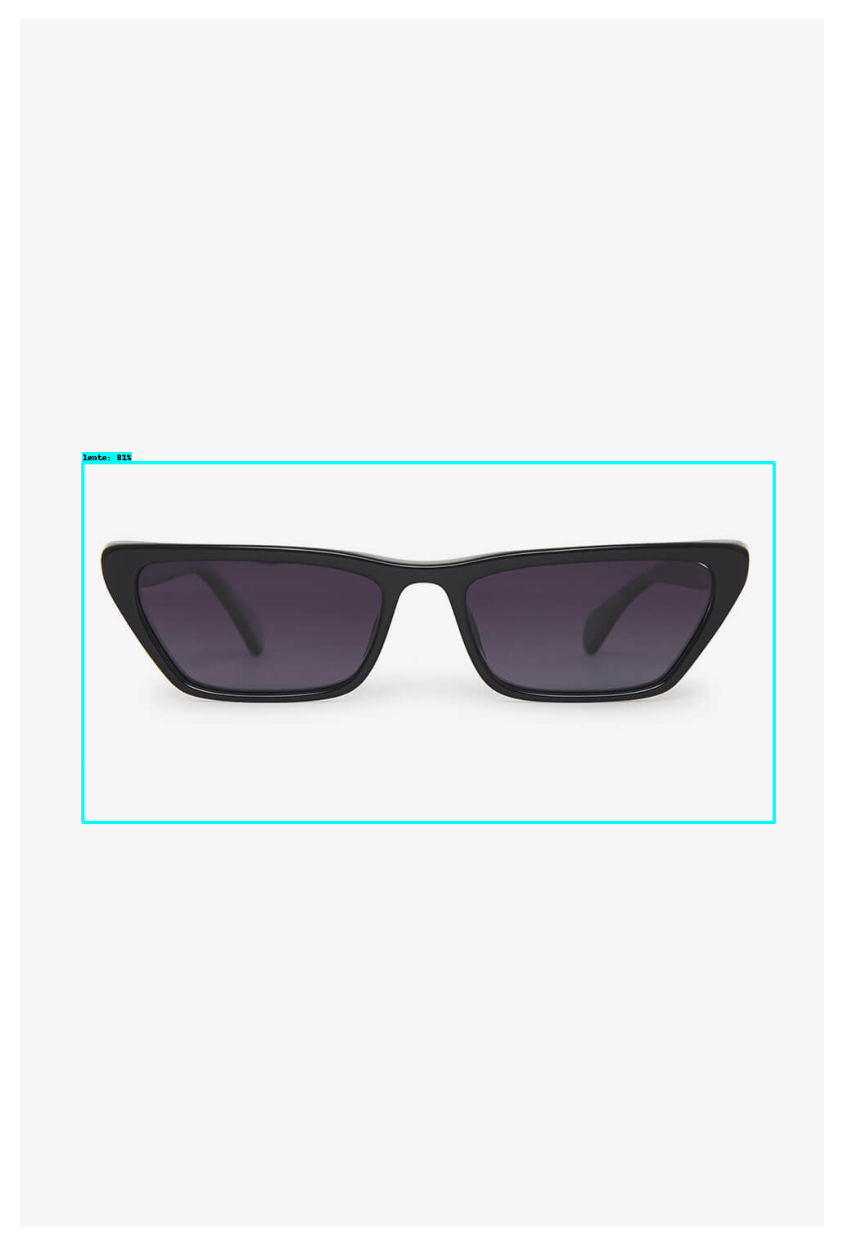

In [48]:
image_name= 'image2.jpg'

#Loading the saved_model
import tensorflow as tf
import time
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from PIL import Image

import cv2
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

IMAGE_SIZE = (12, 8) # Output display size as you want
import matplotlib.pyplot as plt
PATH_TO_SAVED_MODEL=os.path.join(paths['DATA_PATH'],'inference_graph','saved_model')
print('Loading model...', end='')

# Load saved model and build the detection function
detect_fn=tf.saved_model.load(PATH_TO_SAVED_MODEL)
print('Done!')

#Loading the label_map
category_index=label_map_util.create_category_index_from_labelmap(files['LABEL_MAP'],use_display_name=True)
#category_index=label_map_util.create_category_index_from_labelmap([path_to_label_map],use_display_name=True)

def load_image_into_numpy_array(path):

    return np.array(Image.open(path))

image_path = os.path.join(paths['DATA_PATH'],'test_images',image_name)
#print('Running inference for {}... '.format(image_path), end='')

image_np = load_image_into_numpy_array(image_path)

# The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
input_tensor = tf.convert_to_tensor(image_np)
# The model expects a batch of images, so add an axis with `tf.newaxis`.
input_tensor = input_tensor[tf.newaxis, ...]

detections = detect_fn(input_tensor)

# All outputs are batches tensors.
# Convert to numpy arrays, and take index [0] to remove the batch dimension.
# We're only interested in the first num_detections.
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_detections,
      detections['detection_boxes'],
      detections['detection_classes'],
      detections['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=1,
      min_score_thresh=.4, # Adjust this value to set the minimum probability boxes to be classified as True
      agnostic_mode=False)
%matplotlib inline
plt.figure(figsize=IMAGE_SIZE, dpi=200)
plt.axis("off")
plt.imshow(image_np_with_detections)
plt.show()

In [49]:
%load_ext tensorboard
%tensorboard --logdir {paths['TRAINING_PATH']}

# Convercion a TFLite

The output folder will contain an intermediate SavedModel that can be used with the TfLite converter.


In [50]:
command = "python {} -pipeline_config_path {} --trained_checkpoint_dir {} --output_directory {}".format(os.path.join(paths['MODELS_PATH'],'research','object_detection','export_tflite_graph_tf2.py'),files['MODEL_CONFIG'],paths['TRAINING_PATH'],os.path.join(paths['DATA_PATH'],'tflite'))
command

'python Tensorflow/models/research/object_detection/export_tflite_graph_tf2.py -pipeline_config_path workspace/data/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.config --trained_checkpoint_dir workspace/training --output_directory workspace/data/tflite'

In [51]:
!{command}

2022-04-26 15:29:29.011656: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-26 15:29:29.016003: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-26 15:29:29.016223: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-26 15:29:29.020212: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

W0426 15:29:53.359003 140613373469632 save.py:233] Found untraced functions such as WeightSharedConvolutionalBoxPredictor_layer_call_fn, WeightSharedConvolutionalBoxPredictor_layer_call_and_return_conditional_losses, WeightSharedConvolutionalBoxHead_layer_call_fn, WeightSharedConvolutionalBoxHead_layer_call_and_return_conditional_losses, WeightSharedConvolutionalClassHead_layer_call_fn while saving (showing 5 of 173). These functions will not be directly callable after loading.
INFO:tensorflow:Assets written to: workspace/data/tflite/saved_model/assets
I0426 15:29:57.503239 140613373469632 builder_impl.py:779] Assets written to: workspace/data/tflite/saved_model/assets


GRAPH DEL MODELO ENTRENADO 

In [52]:
command = "saved_model_cli show --dir {} --tag_set serve --all".format(os.path.join(paths['DATA_PATH'],'tflite','saved_model'))

In [53]:
!{command}


MetaGraphDef with tag-set: 'serve' contains the following SignatureDefs:

signature_def['__saved_model_init_op']:
  The given SavedModel SignatureDef contains the following input(s):
  The given SavedModel SignatureDef contains the following output(s):
    outputs['__saved_model_init_op'] tensor_info:
        dtype: DT_INVALID
        shape: unknown_rank
        name: NoOp
  Method name is: 

signature_def['serving_default']:
  The given SavedModel SignatureDef contains the following input(s):
    inputs['input'] tensor_info:
        dtype: DT_FLOAT
        shape: (1, 320, 320, 3)
        name: serving_default_input:0
  The given SavedModel SignatureDef contains the following output(s):
    outputs['output_0'] tensor_info:
        dtype: DT_FLOAT
        shape: ()
        name: StatefulPartitionedCall:0
    outputs['output_1'] tensor_info:
        dtype: DT_FLOAT
        shape: ()
        name: StatefulPartitionedCall:1
    outputs['output_2'] tensor_info:
        dtype: DT_FLOAT
    

El conversor de TensorFlow Lite toma un modelo de TensorFlow y genera un modelo de TensorFlow Lite .tflite

In [54]:
command = "tflite_convert --saved_model_dir={} --output_file={}".format(os.path.join(paths['DATA_PATH'],'tflite','saved_model'),os.path.join(paths['DATA_PATH'],'tflite','detect.tflite'))
command

'tflite_convert --saved_model_dir=workspace/data/tflite/saved_model --output_file=workspace/data/tflite/detect.tflite'

In [55]:
!{command}

2022-04-26 15:30:11.219353: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-26 15:30:11.223612: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-26 15:30:11.223865: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-26 15:30:11.655087: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Las ultimas versiones de TFLite requieren el agregado de la siguiente metadata

In [56]:
#!pip install -q tflite-model-maker
#!pip install -q tflite-support

In [57]:
#Tomado de https://github.com/techzizou
!mkdir -p os.path.join('workspace','data','tflite','tflite_with_metadata')
import tflite_support
from tflite_support.metadata_writers import object_detector
from tflite_support.metadata_writers import writer_utils
from tflite_support import metadata
import flatbuffers
import os
from tensorflow_lite_support.metadata import metadata_schema_py_generated as _metadata_fb
from tensorflow_lite_support.metadata.python import metadata as _metadata
from tensorflow_lite_support.metadata.python.metadata_writers import metadata_info
from tensorflow_lite_support.metadata.python.metadata_writers import metadata_writer
from tensorflow_lite_support.metadata.python.metadata_writers import writer_utils

ObjectDetectorWriter = object_detector.MetadataWriter

_MODEL_PATH = os.path.join(paths['DATA_PATH'],'tflite','detect.tflite')
_LABEL_FILE = os.path.join(paths['DATA_PATH'],'labelmap.txt')
_SAVE_TO_PATH = os.path.join(paths['DATA_PATH'],'tflite','tflite_with_metadata','detect.tflite')

writer = ObjectDetectorWriter.create_for_inference(
    writer_utils.load_file(_MODEL_PATH), [127.5], [127.5], [_LABEL_FILE])
writer_utils.save_file(writer.populate(), _SAVE_TO_PATH)

# Verify the populated metadata and associated files.
displayer = metadata.MetadataDisplayer.with_model_file(_SAVE_TO_PATH)
print("Metadata populated:")
print(displayer.get_metadata_json())
print("Associated file(s) populated:")
print(displayer.get_packed_associated_file_list())

model_meta = _metadata_fb.ModelMetadataT()
model_meta.name = "SSD_Detector"
model_meta.description = (
    "Identify which of a known set of objects might be present and provide "
    "information about their positions within the given image or a video "
    "stream.")

# Creates input info.
input_meta = _metadata_fb.TensorMetadataT()
input_meta.name = "image"
input_meta.content = _metadata_fb.ContentT()
input_meta.content.contentProperties = _metadata_fb.ImagePropertiesT()
input_meta.content.contentProperties.colorSpace = (
    _metadata_fb.ColorSpaceType.RGB)
input_meta.content.contentPropertiesType = (
    _metadata_fb.ContentProperties.ImageProperties)
input_normalization = _metadata_fb.ProcessUnitT()
input_normalization.optionsType = (
    _metadata_fb.ProcessUnitOptions.NormalizationOptions)
input_normalization.options = _metadata_fb.NormalizationOptionsT()
input_normalization.options.mean = [127.5]
input_normalization.options.std = [127.5]
input_meta.processUnits = [input_normalization]
input_stats = _metadata_fb.StatsT()
input_stats.max = [255]
input_stats.min = [0]
input_meta.stats = input_stats

# Creates outputs info.
output_location_meta = _metadata_fb.TensorMetadataT()
output_location_meta.name = "location"
output_location_meta.description = "The locations of the detected boxes."
output_location_meta.content = _metadata_fb.ContentT()
output_location_meta.content.contentPropertiesType = (
    _metadata_fb.ContentProperties.BoundingBoxProperties)
output_location_meta.content.contentProperties = (
    _metadata_fb.BoundingBoxPropertiesT())
output_location_meta.content.contentProperties.index = [1, 0, 3, 2]
output_location_meta.content.contentProperties.type = (
    _metadata_fb.BoundingBoxType.BOUNDARIES)
output_location_meta.content.contentProperties.coordinateType = (
    _metadata_fb.CoordinateType.RATIO)
output_location_meta.content.range = _metadata_fb.ValueRangeT()
output_location_meta.content.range.min = 2
output_location_meta.content.range.max = 2

output_class_meta = _metadata_fb.TensorMetadataT()
output_class_meta.name = "category"
output_class_meta.description = "The categories of the detected boxes."
output_class_meta.content = _metadata_fb.ContentT()
output_class_meta.content.contentPropertiesType = (
    _metadata_fb.ContentProperties.FeatureProperties)
output_class_meta.content.contentProperties = (
    _metadata_fb.FeaturePropertiesT())
output_class_meta.content.range = _metadata_fb.ValueRangeT()
output_class_meta.content.range.min = 2
output_class_meta.content.range.max = 2
label_file = _metadata_fb.AssociatedFileT()
label_file.name = os.path.basename("labelmap.txt")
label_file.description = "Label of objects that this model can recognize."
label_file.type = _metadata_fb.AssociatedFileType.TENSOR_VALUE_LABELS
output_class_meta.associatedFiles = [label_file]

output_score_meta = _metadata_fb.TensorMetadataT()
output_score_meta.name = "score"
output_score_meta.description = "The scores of the detected boxes."
output_score_meta.content = _metadata_fb.ContentT()
output_score_meta.content.contentPropertiesType = (
    _metadata_fb.ContentProperties.FeatureProperties)
output_score_meta.content.contentProperties = (
    _metadata_fb.FeaturePropertiesT())
output_score_meta.content.range = _metadata_fb.ValueRangeT()
output_score_meta.content.range.min = 2
output_score_meta.content.range.max = 2

output_number_meta = _metadata_fb.TensorMetadataT()
output_number_meta.name = "number of detections"
output_number_meta.description = "The number of the detected boxes."
output_number_meta.content = _metadata_fb.ContentT()
output_number_meta.content.contentPropertiesType = (
    _metadata_fb.ContentProperties.FeatureProperties)
output_number_meta.content.contentProperties = (
    _metadata_fb.FeaturePropertiesT())

# Creates subgraph info.
group = _metadata_fb.TensorGroupT()
group.name = "detection result"
group.tensorNames = [
    output_location_meta.name, output_class_meta.name,
    output_score_meta.name
]
subgraph = _metadata_fb.SubGraphMetadataT()
subgraph.inputTensorMetadata = [input_meta]
subgraph.outputTensorMetadata = [
    output_location_meta, output_class_meta, output_score_meta,
    output_number_meta
]
subgraph.outputTensorGroups = [group]
model_meta.subgraphMetadata = [subgraph]

b = flatbuffers.Builder(0)
b.Finish(
    model_meta.Pack(b),
    _metadata.MetadataPopulator.METADATA_FILE_IDENTIFIER)
metadata_buf = b.Output()

Metadata populated:
{
  "name": "ObjectDetector",
  "description": "Identify which of a known set of objects might be present and provide information about their positions within the given image or a video stream.",
  "subgraph_metadata": [
    {
      "input_tensor_metadata": [
        {
          "name": "image",
          "description": "Input image to be detected.",
          "content": {
            "content_properties_type": "ImageProperties",
            "content_properties": {
              "color_space": "RGB"
            }
          },
          "process_units": [
            {
              "options_type": "NormalizationOptions",
              "options": {
                "mean": [
                  127.5
                ],
                "std": [
                  127.5
                ]
              }
            }
          ],
          "stats": {
            "max": [
              1.0
            ],
            "min": [
              -1.0
            ]
          }
    